<a href="https://colab.research.google.com/github/phonesmash/IZAAZS_WEBSITE/blob/main/ITM_618_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif # Used for information gain calculation

# Read train data and test data in two different variables
# Train data
trainData = pd.read_csv('trainset.csv')
trainData

FileNotFoundError: [Errno 2] No such file or directory: 'trainset.csv'

In [ ]:
trainData.dtypes

,0
age,int64
job,object
marital,object
education,object
housing,object
loan,object
contact,object
month,object
day_of_week,object
duration,int64


In [ ]:
#Test Data
testData = pd.read_csv('testset.csv')
testData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.50,yes
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.50,yes
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.50,yes
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.50,yes
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.50,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,nonexistent,4963.60,no
11913,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,9,success,4963.60,no
11914,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,nonexistent,4963.60,no
11915,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,nonexistent,4963.60,no


In [ ]:
# Check for columns with the string "unknown" - TrainData
train_unknown_cols = [col for col in trainData.columns if 'unknown' in trainData[col].astype(str).values]

train_unknown_cols

['job', 'marital', 'education', 'housing', 'loan']

In [ ]:
# Check for columns with the string "unknown" - TestData
test_unknown_cols = [col for col in testData.columns if 'unknown' in testData[col].astype(str).values]

test_unknown_cols

['job', 'marital', 'education', 'housing', 'loan']

## Handle Unknown Values - Train Data

### Handling Unknown Values for the Job Column - Train Data

**Handling Unknown Values - Local Estimation Approach for the Job Column - Train Data**

In [6]:
# List of categorical columns to compare with 'job'
categorical_columns = ['education', 'marital', 'housing', 'loan', 'day_of_week', 'contact', 'poutcome']

# Dictionary to store the results
group_analysis_results = {}

# Loop through each column
for col in categorical_columns:
    # Group the data by the current column and calculate the most common job for each group
    grouped = trainData.groupby(col)['job'].apply(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )
    group_analysis_results[col] = grouped

    # Print the results for each column
    print(f"\nMost frequent job for each category in '{col}':")
    print(grouped)

NameError: name 'trainData' is not defined

In [7]:
# Apply Imputation: Use the mode of 'job' within each 'education' group for more informed filling of missing values
job_mode_per_education = trainData.groupby('education')['job'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

# Function for local imputation: Replaces 'unknown' jobs based on 'education'
def impute_job_local(row):
    if row['job'] == 'unknown':
        # If education level has a common job, use it
        if row['education'] in job_mode_per_education:
            return job_mode_per_education[row['education']]
        return 'unknown'  # Leave as 'unknown' if no match is found
    return row['job']  # Keep the job if it’s not missing

# Update the job column using the function above
trainData['job_local'] = trainData.apply(impute_job_local, axis=1)

# Verify the number of each job after filling in missing values
print("Local Imputation Value Counts:")
print(trainData['job_local'].value_counts())

NameError: name 'trainData' is not defined

**Handling Unknown Values for the Job column - Global Estimation Approach**

In [ ]:
# Calculate the global mode of 'job'
global_mode = trainData['job'].mode()[0]

# Function to fill in missing jobs with the global mode
def impute_job_global(row):
    if row['job'] == 'unknown':  # Check if job is missing
        return global_mode  # Replace missing value with the most common job
    return row['job']  # Keep the job if it’s not missing

# Apply the global imputation function to the dataset
trainData['job_global'] = trainData.apply(impute_job_global, axis=1)

# Print the number of each job after filling in missing values globally
print("\nGlobal Imputation Value Counts:")
print(trainData['job_global'].value_counts())

**Compare the Results of Local and Global Estimation for the Job Column**

In [ ]:
#Compare local estimation and global estimation
print("\nLocal Imputation Distribution:")
print(trainData['job_local'].value_counts())

print("\nGlobal Imputation Distribution:")
print(trainData['job_global'].value_counts())

In [ ]:
# Check if 'job_local' contains 'unknown'
if 'unknown' in trainData['job_local'].values:
    print("'unknown' values still present in 'job_local' column.")
else:
    print("'unknown' values have been successfully removed from 'job_local' column.")

In [ ]:
# Check if 'job_global' contains 'unknown'
if 'unknown' in trainData['job_local'].values:
    print("'unknown' values still present in 'job_local' column.")
else:
    print("'unknown' values have been successfully removed from 'job_local' column.")

In [ ]:
# Display rows where the 'job' column is 'unknown'
unknown_job_data = trainData[trainData['job'] == 'unknown']
unknown_job_data

In [ ]:
# Display rows where 'job_local' and 'job_global' are not equal
unequal_jobs = trainData[trainData['job_local'] != trainData['job_global']]
unequal_jobs

In [ ]:
trainData

### Handle Unknown Values for Marital Column - Train Data

*   List item
*   List item



**Handling Unknown Values - Local Estimation Approach for the Marital Column - Train Data**

In [ ]:
# List of categorical columns to compare with 'marital'
categorical_columns_marital = ['education', 'job', 'housing', 'loan', 'day_of_week', 'contact', 'poutcome']

# Dictionary to store the results
group_analysis_results_marital = {}

# Loop through each column
for col_marital in categorical_columns_marital:
    # Group the data by the current column and calculate the most common marital status for each group
    grouped_marital = trainData.groupby(col_marital)['marital'].apply(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )
    group_analysis_results_marital[col] = grouped_marital

 # Print the results for each column
    print(f"\nMost frequent marital status for each category in '{col_marital}':")
    print(grouped_marital)

**Handle Unknown Values for Marital Column using Global Estimation**

In [ ]:
# Calculate the mode of the 'marital' column
marital_mode = trainData['marital'].mode()[0]

# Create a new column 'marital_global' and fill it with the mode where 'marital' is 'unknown'
trainData['marital_global'] = trainData['marital'].apply(lambda x: marital_mode if x == 'unknown' else x)

In [ ]:
# Check to see if the marital_global columns has "unknown" in any rows
if 'unknown' in trainData['marital_global'].values:
    print("'unknown' values present in 'marital_global' column.")
else:
    print("'unknown' values not present in 'marital_global' column.")

In [ ]:
# Display columns where the 'marital' column is 'unknown'
unknown_marital_data = trainData[trainData['marital'] == 'unknown']
unknown_marital_data

### Handle Unknown Values for Education Column - Train Data

**Handling Unknown Values - Local Estimation Approach for the Marital Column - Train Data**

In [ ]:
# List of categorical columns to compare with 'education'
categorical_columns_edu = ['job', 'marital', 'housing', 'loan', 'day_of_week', 'contact', 'poutcome']

# Dictionary to store the results
group_analysis_results_edu = {}

# Loop through each column
for col_edu in categorical_columns_edu:
    # Group the data by the current column and calculate the most common education for each group
    grouped_edu = trainData.groupby(col_edu)['education'].apply(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )
    group_analysis_results[col_edu] = grouped_edu

    # Print the results for each column
    print(f"\nMost frequent job for each category in '{col_edu}':")
    print(grouped_edu)

In [ ]:
# Apply Imputation: Use the mode of 'job' within each 'education' group for more informed filling of missing values
edu_mode_per_job = trainData.groupby('job')['education'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

# Function for local imputation: Replaces 'unknown' edcuation levels based on 'education'
def impute_edu_local(row):
    if row['education'] == 'unknown':
        # If job has a common education level, use it
        if row['job'] in edu_mode_per_job:
            return edu_mode_per_job[row['job']]
        return 'unknown'  # Leave as 'unknown' if no match is found
    return row['education']  # Keep the education level if it’s not missing

# Update the education column using the function above
trainData['edu_local'] = trainData.apply(impute_edu_local, axis=1)

# Verify the number of each education level after filling in missing values
print("Local Imputation Value Counts:")
print(trainData['edu_local'].value_counts())

In [ ]:
# Calculate the global mode of 'education'
global_mode_edu = trainData['education'].mode()[0]

# Function to fill in missing education levels with the global mode
def impute_edu_global(row):
    if row['education'] == 'unknown':  # Check if education level is missing
        return global_mode_edu  # Replace missing value with the most common education level
    return row['education']  # Keep the education level if it’s not missing

# Apply the global imputation function to the dataset
trainData['edu_global'] = trainData.apply(impute_edu_global, axis=1)

# Print the number of each education level after filling in missing values globally
print("\nGlobal Imputation Value Counts:")
print(trainData['edu_global'].value_counts())

In [ ]:
#Compare local estimation and global estimation
print("\nLocal Imputation Distribution:")
print(trainData['edu_local'].value_counts())

print("\nGlobal Imputation Distribution:")
print(trainData['edu_global'].value_counts())

In [ ]:
# Check if 'edu_local' contains 'unknown'
if 'unknown' in trainData['edu_local'].values:
    print("'unknown' values still present in 'edu_local' column.")
else:
    print("'unknown' values have been successfully removed from 'edu_local' column.")

In [ ]:
# Check if 'edu_global' contains 'unknown'
if 'unknown' in trainData['edu_global'].values:
    print("'unknown' values still present in 'job_local' column.")
else:
    print("'unknown' values have been successfully removed from 'edu_global' column.")

In [ ]:
# Display rows where the 'education' column is 'unknown'
unknown_job_data_edu_jobs = trainData[trainData['education'] == 'unknown']
unknown_job_data_edu_jobs

In [ ]:
# Display rows where 'edu_local' and 'edu_global' are not equal
unequal_jobs_edu_jobs = trainData[trainData['edu_local'] != trainData['edu_global']]
unequal_jobs_edu_jobs

In [ ]:
trainData

### Handle Unknown Values for Housing Column - Train Data

**Handle Unknown Values in the Housing Column using Global Estimation**

In [8]:
# Calculate the mode of the 'housing' column
housing_mode = trainData['housing'].mode()[0]

# Create a new column 'housing_mode_filled' and fill it with the mode where 'housing' is 'unknown'
trainData['housing_global'] = trainData['housing'].apply(lambda x: housing_mode if x == 'unknown' else x)

NameError: name 'trainData' is not defined

In [9]:
# Check for unknown values in 'housing_global' column
if 'unknown' in trainData['housing_global'].values:
    print("'unknown' values present in 'housing_global' column.")
else:
    print("'unknown' values not present in 'housing_global' column.")

NameError: name 'trainData' is not defined

In [10]:
trainData

NameError: name 'trainData' is not defined

### Handle Unknown Values for the Loan Column - Train Data

In [ ]:
# Calculate the mode of the 'loan' column
loan_mode = trainData['loan'].mode()[0]

# Create a new column 'loan_mode_filled' and fill it with the mode where 'loan' is 'unknown'
trainData['loan_global'] = trainData['loan'].apply(lambda x: loan_mode if x == 'unknown' else x)

In [ ]:
# Check for unknown values in the new column
if 'unknown' in trainData['loan_global'].values:
    print("'unknown' values present in 'loan_global' column.")
else:
    print("'unknown' values not present in 'loan_global' column.")

In [ ]:
trainData

In [ ]:
# Keep all columns in trainData except 'job_local' and 'edu_local'
trainData = trainData.drop(['job_local', 'edu_local'], axis=1)

In [ ]:
trainData

## Handle Unknown Values - Test Data

### Handle Unknown Values for the Job Column - Test Data

In [ ]:
# Calculate the global mode of 'job' in the test data
job_global = testData['job'].mode()[0]

# Function to fill in missing jobs with the global mode
def impute_job_global(row):
    if row['job'] == 'unknown':  # Check if job is missing
        return global_mode  # Replace missing value with the most common job
    return row['job']  # Keep the job if it’s not missing

# Apply the global imputation function to the test dataset
testData['job_global'] = testData.apply(impute_job_global, axis=1)

In [ ]:
testData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed,job_global
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.50,yes,retired
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.50,yes,admin.
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.50,yes,admin.
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.50,yes,retired
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.50,yes,retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,nonexistent,4963.60,no,admin.
11913,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,9,success,4963.60,no,unemployed
11914,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,nonexistent,4963.60,no,blue-collar
11915,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,nonexistent,4963.60,no,retired


In [ ]:
# Check if 'job_global' in testData contains 'unknown'
if 'unknown' in testData['job_global'].values:
    print("'unknown' values still present in 'job_global' column of testData.")
else:
    print("'unknown' values have been successfully removed from 'job_global' column of testData.")

'unknown' values have been successfully removed from 'job_global' column of testData.


### Handle Unknown Values for Marital Column in Test Data

In [ ]:
# Calculate the mode of the 'marital' column in testData
marital_mode = testData['marital'].mode()[0]

# Create a new column 'marital_global' and fill it with the mode where 'marital' is 'unknown'
testData['marital_global'] = testData['marital'].apply(lambda x: marital_mode if x == 'unknown' else x)

In [ ]:
# Check if 'marital_global' in testData contains 'unknown'
if 'unknown' in testData['marital_global'].values:
    print("'unknown' values present in 'marital_global' column.")
else:
    print("'unknown' values not present in 'marital_global' column.")

'unknown' values not present in 'marital_global' column.


### Handle Unknown Values for the Education Column - Test Data

In [ ]:
# Calculate the global mode of 'education'
global_mode_edu = testData['education'].mode()[0]

# Function to fill in missing education levels with the global mode
def impute_edu_global(row):
    if row['education'] == 'unknown':  # Check if education level is missing
        return global_mode_edu  # Replace missing value with the most common education level
    return row['education']  # Keep the education level if it’s not missing

# Apply the global imputation function to the dataset
testData['edu_global'] = testData.apply(impute_edu_global, axis=1)

In [ ]:
testData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed,job_global,marital_global,edu_global
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.50,yes,retired,married,university.degree
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.50,yes,admin.,single,high.school
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.50,yes,admin.,married,university.degree
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.50,yes,retired,married,basic.4y
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.50,yes,retired,married,basic.4y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,nonexistent,4963.60,no,admin.,married,university.degree
11913,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,9,success,4963.60,no,unemployed,single,basic.4y
11914,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,nonexistent,4963.60,no,blue-collar,married,professional.course
11915,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,nonexistent,4963.60,no,retired,married,university.degree


In [ ]:
# Check if 'edu_global' contains 'unknown'
if 'unknown' in trainData['edu_global'].values:
    print("'unknown' values still present in 'edu_global' column.")
else:
    print("'unknown' values have been successfully removed from 'edu_global' column.")

'unknown' values have been successfully removed from 'edu_global' column.


### Handle Unknown Values for Housing Column - Test Data

In [ ]:
# Calculate the mode of the 'housing' column
housing_mode = testData['housing'].mode()[0]

# Create a new column 'housing_mode_filled' and fill it with the mode where 'housing' is 'unknown'
testData['housing_global'] = testData['housing'].apply(lambda x: housing_mode if x == 'unknown' else x)

# Create a new column 'housing_mode_filled' and fill it with the mode where 'housing' is 'unknown'
testData['housing_global'] = testData['housing'].apply(lambda x: housing_mode if x == 'unknown' else x)

In [ ]:
# Check for unknown values in 'housing_global' column
if 'unknown' in testData['housing_global'].values:
    print("'unknown' values present in 'housing_global' column.")
else:
    print("'unknown' values not present in 'housing_global' column.")

'unknown' values not present in 'housing_global' column.


In [ ]:
testData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed,job_global,marital_global,edu_global,housing_global
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.50,yes,retired,married,university.degree,no
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.50,yes,admin.,single,high.school,yes
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.50,yes,admin.,married,university.degree,no
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.50,yes,retired,married,basic.4y,yes
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.50,yes,retired,married,basic.4y,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,nonexistent,4963.60,no,admin.,married,university.degree,no
11913,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,9,success,4963.60,no,unemployed,single,basic.4y,yes
11914,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,nonexistent,4963.60,no,blue-collar,married,professional.course,no
11915,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,nonexistent,4963.60,no,retired,married,university.degree,yes


### Handle Unknown Values for the Loan Column - Test Data

In [ ]:
# Calculate the mode of the 'loan' column
loan_mode = testData['loan'].mode()[0]

# Create a new column 'loan_mode_filled' and fill it with the mode where 'loan' is 'unknown'
testData['loan_global'] = testData['loan'].apply(lambda x: loan_mode if x == 'unknown' else x)

In [ ]:
# Check for unknown values in the new column
if 'unknown' in testData['loan_global'].values:
    print("'unknown' values present in 'loan_global' column.")
else:
    print("'unknown' values not present in 'loan_global' column.")

'unknown' values not present in 'loan_global' column.


In [ ]:
testData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed,job_global,marital_global,edu_global,housing_global,loan_global
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.50,yes,retired,married,university.degree,no,no
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.50,yes,admin.,single,high.school,yes,no
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.50,yes,admin.,married,university.degree,no,no
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.50,yes,retired,married,basic.4y,yes,no
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.50,yes,retired,married,basic.4y,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,nonexistent,4963.60,no,admin.,married,university.degree,no,no
11913,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,9,success,4963.60,no,unemployed,single,basic.4y,yes,no
11914,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,nonexistent,4963.60,no,blue-collar,married,professional.course,no,no
11915,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,nonexistent,4963.60,no,retired,married,university.degree,yes,no


## Data Encoding

In [ ]:
# Train Data data types
trainData.dtypes

NameError: name 'trainData' is not defined

In [ ]:
# Test Data data types
testData.dtypes

,0
age,int64
job,object
marital,object
education,object
housing,object
loan,object
contact,object
month,object
day_of_week,object
duration,int64


In [ ]:
# Train Data
print('unique values of the target attribute (Subscribed):', trainData.Subscribed.unique())

# create a new column for target attribute
trainData['Subscribed_val'] = trainData['Subscribed']
# manually assing 1/0 to Yes/No
trainData['Subscribed_val'] = trainData['Subscribed_val'].map({'yes': 1, 'no': 0})
print('unique values of the target attribute (Subscribed_val):', trainData.Subscribed_val.unique())

# Test Data
print('unique values of the target attribute (Subscribed):', testData.Subscribed.unique())
# create a new column for target attribute
testData['Subscribed_val'] = testData['Subscribed']
# manually assing 1/0 to Yes/No
testData['Subscribed_val'] = testData['Subscribed_val'].map({'yes': 1, 'no': 0})
print('unique values of the target attribute (Subscribed_val):', testData.Subscribed_val.unique())

unique values of the target attribute (Subscribed): ['yes' 'no']
unique values of the target attribute (Subscribed_val): [1 0]
unique values of the target attribute (Subscribed): ['yes' 'no']
unique values of the target attribute (Subscribed_val): [1 0]


### One Hot Coding

**One Hot Code**

In [ ]:
# Current table columns
print(trainData.columns)

# Current table columns
print(testData.columns)

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed', 'job_global', 'marital_global',
       'edu_global', 'housing_global', 'loan_global', 'Subscribed_val'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed', 'job_global', 'marital_global',
       'edu_global', 'housing_global', 'loan_global', 'Subscribed_val'],
      dtype='object')


In [ ]:
# Nominal attributes for one-hot encoding Train Data
nominal_attributes = [
    'marital_global',
    'housing_global',
    'loan_global',
    'contact',
    'month',
    'day_of_week',
    'poutcome'
]

In [ ]:
trainData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed,job_global,marital_global,edu_global,housing_global,loan_global,Subscribed_val
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.00,yes,blue-collar,divorced,basic.4y,yes,no,1
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.00,yes,entrepreneur,married,university.degree,yes,no,1
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.00,yes,technician,married,basic.9y,no,no,1
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.00,yes,technician,married,professional.course,yes,no,1
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.00,yes,blue-collar,married,basic.9y,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29266,49,admin.,married,unknown,no,no,cellular,nov,fri,288,1,999,failure,5195.80,no,admin.,married,university.degree,no,no,0
29267,34,management,single,university.degree,unknown,unknown,telephone,nov,fri,114,5,999,nonexistent,5195.80,no,management,single,university.degree,yes,no,0
29268,29,technician,single,professional.course,no,no,cellular,nov,fri,161,3,999,nonexistent,5195.80,no,technician,single,professional.course,no,no,0
29269,57,blue-collar,married,basic.9y,no,yes,cellular,nov,fri,150,2,999,nonexistent,5195.80,no,blue-collar,married,basic.9y,no,yes,0


In [ ]:
# One-hot encode nominal attributes for train and test data separately, without removing the original columns
trainData_oh_encoded = pd.get_dummies(trainData[nominal_attributes], prefix=nominal_attributes, dummy_na=False)
testData_oh_encoded = pd.get_dummies(testData[nominal_attributes], prefix=nominal_attributes, dummy_na=False)

# Concatenate the one-hot encoded columns back to the original datasets
trainData = pd.concat([trainData, trainData_oh_encoded], axis=1)
testData = pd.concat([testData, testData_oh_encoded], axis=1)

# Align columns of train and test data to ensure they are identical
trainData, testData = trainData.align(testData, join='inner', axis=1)

# Check the resulting shapes to ensure alignment
print("Shape of Train Data after Encoding:", trainData.shape)
print("Shape of Test Data after Encoding:", testData.shape)

# Display a preview of the processed data
print("\nTrain Data after Encoding:")
print(trainData.head())

print("\nTest Data after Encoding:")
print(testData.head())


Shape of Train Data after Encoding: (29271, 48)
Shape of Test Data after Encoding: (11917, 48)

Train Data after Encoding:
   age           job   marital            education housing loan    contact  \
0   41   blue-collar  divorced             basic.4y     yes   no  telephone   
1   49  entrepreneur   married    university.degree     yes   no  telephone   
2   49    technician   married             basic.9y      no   no  telephone   
3   41    technician   married  professional.course     yes   no  telephone   
4   45   blue-collar   married             basic.9y     yes   no  telephone   

  month day_of_week  duration  campaign  pdays     poutcome  nr.employed  \
0   may         mon      1575         1    999  nonexistent      5191.00   
1   may         mon      1042         1    999  nonexistent      5191.00   
2   may         mon      1467         1    999  nonexistent      5191.00   
3   may         mon       579         1    999  nonexistent      5191.00   
4   may         mon   

In [ ]:
# Check if trainData and testData have the same column names
# Get the column names from train and test data
train_columns = set(trainData.columns)
test_columns = set(testData.columns)

# Compare the columns
if train_columns == test_columns:
    print("Train and test data have identical column names.")
else:
    print("Train and test data do NOT have identical column names.")
    print("Columns in train data but not in test data:", train_columns - test_columns)
    print("Columns in test data but not in train data:", test_columns - train_columns)


Train and test data have identical column names.


In [ ]:
# trainData columns
trainData.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed', 'job_global', 'marital_global',
       'edu_global', 'housing_global', 'loan_global', 'Subscribed_val',
       'marital_global_divorced', 'marital_global_married',
       'marital_global_single', 'housing_global_no', 'housing_global_yes',
       'loan_global_no', 'loan_global_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [ ]:
# testData columns
testData.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed', 'job_global', 'marital_global',
       'edu_global', 'housing_global', 'loan_global', 'Subscribed_val',
       'marital_global_divorced', 'marital_global_married',
       'marital_global_single', 'housing_global_no', 'housing_global_yes',
       'loan_global_no', 'loan_global_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [ ]:
# Get the original nominal attributes
nominal_attributes = ['marital_global', 'housing_global', 'loan_global', 'contact', 'month', 'day_of_week', 'poutcome']

# Get the one-hot encoded columns by checking the new columns in the data
one_hot_columns_train = [col for col in trainData.columns if any(attr in col for attr in nominal_attributes)]
one_hot_columns_test = [col for col in testData.columns if any(attr in col for attr in nominal_attributes)]

# Display the one-hot encoded columns in the train and test data
print("One-hot encoded columns in Train Data:")
print(one_hot_columns_train)

print("\nOne-hot encoded columns in Test Data:")
print(one_hot_columns_test)


One-hot encoded columns in Train Data:
['contact', 'month', 'day_of_week', 'poutcome', 'marital_global', 'housing_global', 'loan_global', 'marital_global_divorced', 'marital_global_married', 'marital_global_single', 'housing_global_no', 'housing_global_yes', 'loan_global_no', 'loan_global_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

One-hot encoded columns in Test Data:
['contact', 'month', 'day_of_week', 'poutcome', 'marital_global', 'housing_global', 'loan_global', 'marital_global_divorced', 'marital_global_married', 'marital_global_single', 'housing_global_no', 'housing_global_yes', 'loan_global_no', 'loan_global_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec'

### Ordinal Encoding

**Convert job_global to Ordinal - Train and Test Datas**

In [ ]:
# Convert job_global Attribute to Ordinal - Train Data
print('Unique values of attribute job_global:', trainData.job_global.unique())
# New column for job_global attribute
trainData['job_global_val'] = trainData['job_global']
# Manually assign values to job_global
trainData['job_global_val'] = trainData['job_global_val'].map({
    'student': 0,
    'blue-collar': 1,
    'housemaid': 2,
    'retired': 3,
    'unemployed': 4,
    'admin.': 5,
    'services': 6,
    'technician': 7,
    'self-employed': 8,
    'management': 9,
    'entrepreneur': 10
})

Unique values of attribute job_global: ['blue-collar' 'entrepreneur' 'technician' 'housemaid' 'admin.' 'services'
 'management' 'student' 'unemployed' 'self-employed' 'retired']


In [ ]:
# Convert job_global Attribute to Ordinal - Test Data
print('Unique values of attribute job_global:', testData.job_global.unique())
# New column for job_global attribute
testData['job_global_val'] = testData['job_global']
# Manually assign values to job_global
testData['job_global_val'] = testData['job_global_val'].map({
    'student': 0,
    'blue-collar': 1,
    'housemaid': 2,
    'retired': 3,
    'unemployed': 4,
    'admin.': 5,
    'services': 6,
    'technician': 7,
    'self-employed': 8,
    'management': 9,
    'entrepreneur': 10
})

Unique values of attribute job_global: ['retired' 'admin.' 'services' 'student' 'management' 'technician'
 'housemaid' 'blue-collar' 'unemployed' 'entrepreneur' 'self-employed']


****Convert edu_global (education column without unknown values) to Ordinal - Train and Test Datas****

In [ ]:
# Convert edu_global (education without the unknown) Attribute to Ordinal - Train Data
print('Unique values of attribute edu_global:', trainData.edu_global.unique())
# New column for job_global attribute
trainData['edu_global_val'] = trainData['edu_global']
# Manually assign values to job_global
trainData['edu_global_val'] = trainData['edu_global_val'].map({
    'illiterate' : 0, # no education at all
    'basic.4y': 1, # basic education, 4 years
    'basic.6y': 2, # basic education, 6 years
    'basic.9y': 3, # basic education, 9 years
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
})

print('Unique values of attribute edu_global:', trainData.edu_global_val.unique())

NameError: name 'trainData' is not defined

In [ ]:
# Convert edu_global (education without the unknown) Attribute to Ordinal - Test Data
print('Unique values of attribute edu_global:', testData.edu_global.unique())
# New column for job_global attribute
testData['edu_global_val'] = testData['edu_global']
# Manually assign values to job_global
testData['edu_global_val'] = testData['edu_global_val'].map({
    'illiterate' : 0, # no education at all
    'basic.4y': 1, # basic education, 4 years
    'basic.6y': 2, # basic education, 6 years
    'basic.9y': 3, # basic education, 9 years
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
})

print('Unique values of attribute edu_global:', testData.edu_global_val.unique())

Unique values of attribute edu_global: ['university.degree' 'high.school' 'basic.4y' 'basic.6y'
 'professional.course' 'basic.9y' 'illiterate']
Unique values of attribute edu_global: [6 4 1 2 5 3 0]


In [ ]:
print("Train Data Columns:")
print(trainData.columns)

print("\nTest Data Columns:")
testData.columns

Train Data Columns:
Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed', 'job_global', 'marital_global',
       'edu_global', 'housing_global', 'loan_global', 'Subscribed_val',
       'marital_global_divorced', 'marital_global_married',
       'marital_global_single', 'housing_global_no', 'housing_global_yes',
       'loan_global_no', 'loan_global_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'job_global_val',
       'edu_global_val'],
      dtype='object')

Test Data Columns:


Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed', 'job_global', 'marital_global',
       'edu_global', 'housing_global', 'loan_global', 'Subscribed_val',
       'marital_global_divorced', 'marital_global_married',
       'marital_global_single', 'housing_global_no', 'housing_global_yes',
       'loan_global_no', 'loan_global_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'job_global_val',
       'edu_global_val'],
      dtype='object')

In [ ]:
# Check if trainData and testData have the same column names and number of columns

# Get the column names of both trainData and testData
train_columns = set(trainData.columns)
test_columns = set(testData.columns)

# Compare the column names
if train_columns == test_columns:
    print("Train and Test data have the same column names.")
else:
    # Find columns that are in trainData but not in testData
    missing_in_test = train_columns - test_columns
    # Find columns that are in testData but not in trainData
    missing_in_train = test_columns - train_columns

    if missing_in_test:
        print("Columns present in Train data but not in Test data:", missing_in_test)
    else:
        print("No columns are missing in Test data.")

    if missing_in_train:
        print("Columns present in Test data but not in Train data:", missing_in_train)
    else:
        print("No columns are missing in Train data.")

# Check if the number of columns is the same in both datasets
if len(trainData.columns) == len(testData.columns):
    print("Both Train and Test data have the same number of columns.")
else:
    print(f"Train data has {len(trainData.columns)} columns, but Test data has {len(testData.columns)} columns.")

Train and Test data have the same column names.
Both Train and Test data have the same number of columns.


# Data Exploration

# information gain: https://www.kaggle.com/code/vickysen/feature-selection-using-information-gain

# use all columns **except**, 'job', 'marital', 'education', 'housing', 'loan', for information gain and classifciation models

# Once information gain finds the good columns use those columns to build classification models and ignore every other column

# target variable is 'Subscribed_val' which is derived from 'Subscribed'



## Information Gain

In [ ]:
# Columns that are strings
string_columns = trainData.select_dtypes(include=['object']).columns
string_columns

NameError: name 'trainData' is not defined

In [ ]:
# Separate features (X) and target variable (y)
X = trainData.drop(columns=['Subscribed_val', 'Subscribed', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'job_global', 'marital_global',
       'edu_global', 'housing_global', 'loan_global'])  # Drop the target variable, categorical columns, and columns with unknown values
y = trainData['Subscribed_val']  # Target variable

# Calculate information gain for each feature
ig = mutual_info_classif(X, y)

# Create a dictionary to store the feature names and their information gain
ig_dict = {X.columns[i]: ig[i] for i in range(len(X.columns))}

# Sort the dictionary by the information gain in descending order
ig_dict_sorted = dict(sorted(ig_dict.items(), key=lambda item: item[1], reverse=True))

# Select the top n features with the highest information gain
n = 10
selected_features = list(ig_dict_sorted.keys())[:n]

# Print the selected features
print('Selected Features:')
print(selected_features)

# Visualize the information gain of each feature
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=list(ig_dict_sorted.values()), y=list(ig_dict_sorted.keys()))
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature Name')
plt.show()

NameError: name 'trainData' is not defined

## Summary of Statistics for Train Set

In [ ]:
# Display summary statistics for trainData - Numerical Values
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(trainData.describe())

,age,duration,campaign,pdays,nr.employed,Subscribed_val,job_global_val,edu_global_val
count,29271.00,29271.00,29271.00,29271.00,29271.00,29271.00,29271.00,29271.00
mean,40.13,266.33,2.74,988.24,5205.36,0.11,4.88,4.22
std,9.52,272.83,3.09,102.88,36.31,0.31,2.75,1.66
min,17.00,0.00,1.00,0.00,5017.50,0.00,0.00,0.00
25%,32.00,103.00,1.00,999.00,5191.00,0.00,2.00,3.00
50%,39.00,179.00,2.00,999.00,5228.10,0.00,5.00,4.00
75%,47.00,327.00,3.00,999.00,5228.10,0.00,7.00,6.00
max,88.00,4918.00,56.00,999.00,5228.10,1.00,10.00,6.00


In [ ]:
# Display summary statistics for trainData - Categorical
# Set display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', 20)  # Set maximum column width for readability

# Select only categorical columns, excluding the specified ones
exclude_columns = ['job', 'marital', 'education', 'housing', 'loan']
categorical_columns = trainData.select_dtypes(include=['object']).drop(columns=exclude_columns)

# Display statistics for categorical columns in table format
categorical_stats = categorical_columns.describe()
print("\nStatistics for Categorical Columns:")
display(categorical_stats)


Statistics for Categorical Columns:


,contact,month,day_of_week,poutcome,Subscribed,job_global,marital_global,edu_global,housing_global,loan_global
count,29271,29271,29271,29271,29271,29271,29271,29271,29271,29271
unique,2,10,5,3,2,11,3,7,2,2
top,cellular,may,thu,nonexistent,no,admin.,married,university.degree,yes,no
freq,15499,8287,6138,28015,26075,7573,18438,9789,15576,24862


## Bar Plots

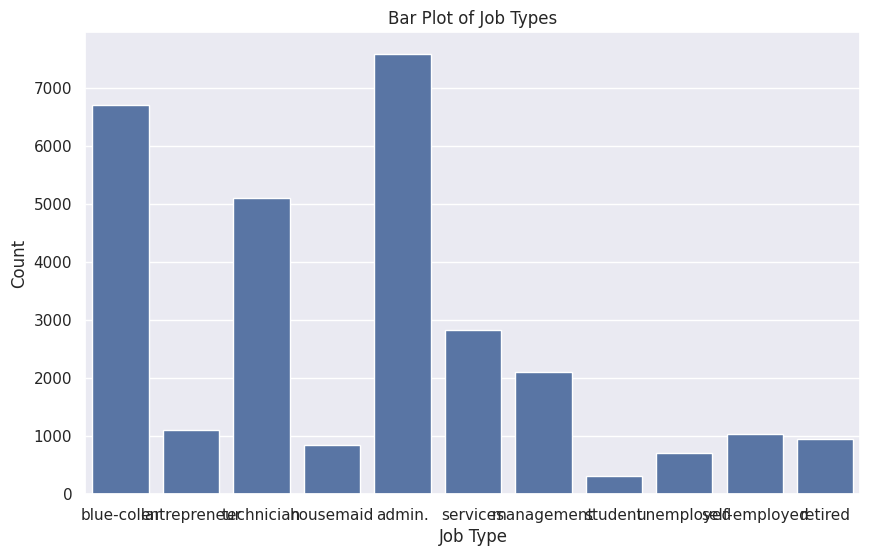

In [ ]:
# prompt: Make a bar plot for categorical features from trainData, make the title for the job_global chart say "Bar Plot of Job Types"

plt.figure(figsize=(10, 6))
sns.countplot(x='job_global', data=trainData)
plt.title('Bar Plot of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

## Histograms

Text(0, 0.5, 'Frequency')

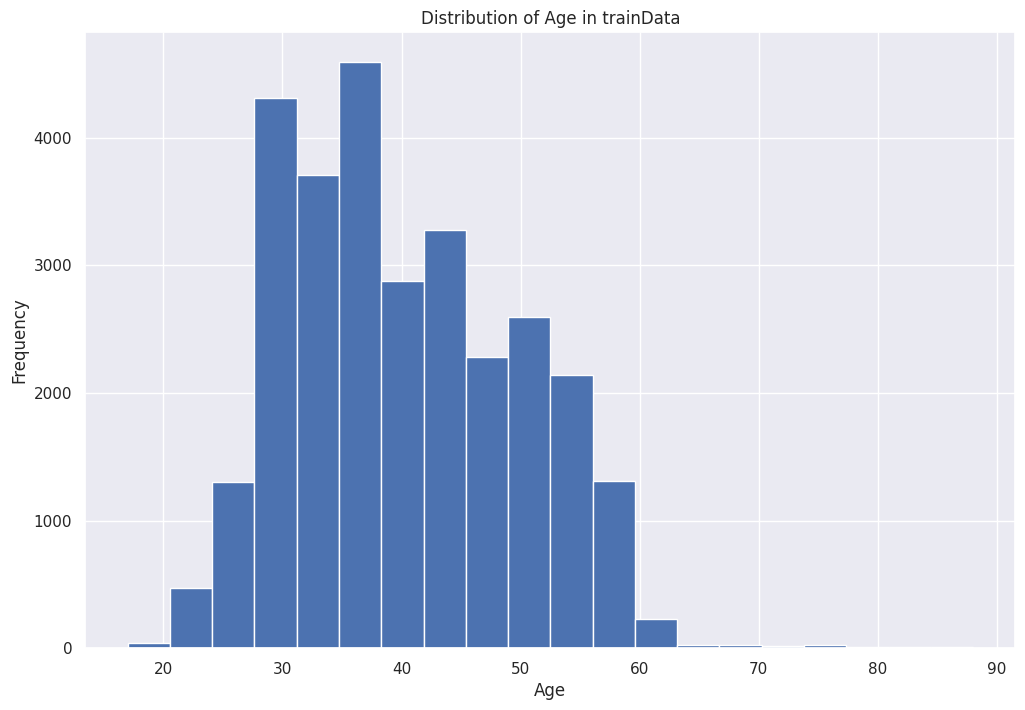

In [ ]:
trainData.hist(column=['age'], bins=20)
plt.title('Distribution of Age in trainData')
plt.xlabel('Age')
plt.ylabel('Frequency')


array([[<Axes: title={'center': 'nr.employed'}>]], dtype=object)

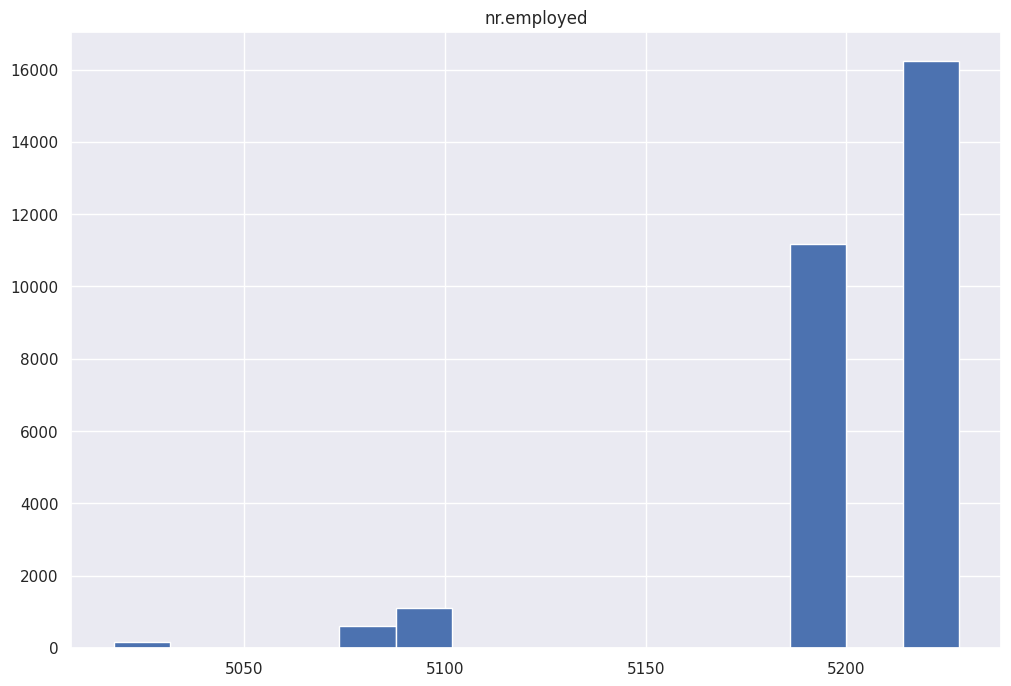

In [ ]:
trainData.hist(column=['nr.employed'], bins=15)


array([[<Axes: title={'center': 'pdays'}>]], dtype=object)

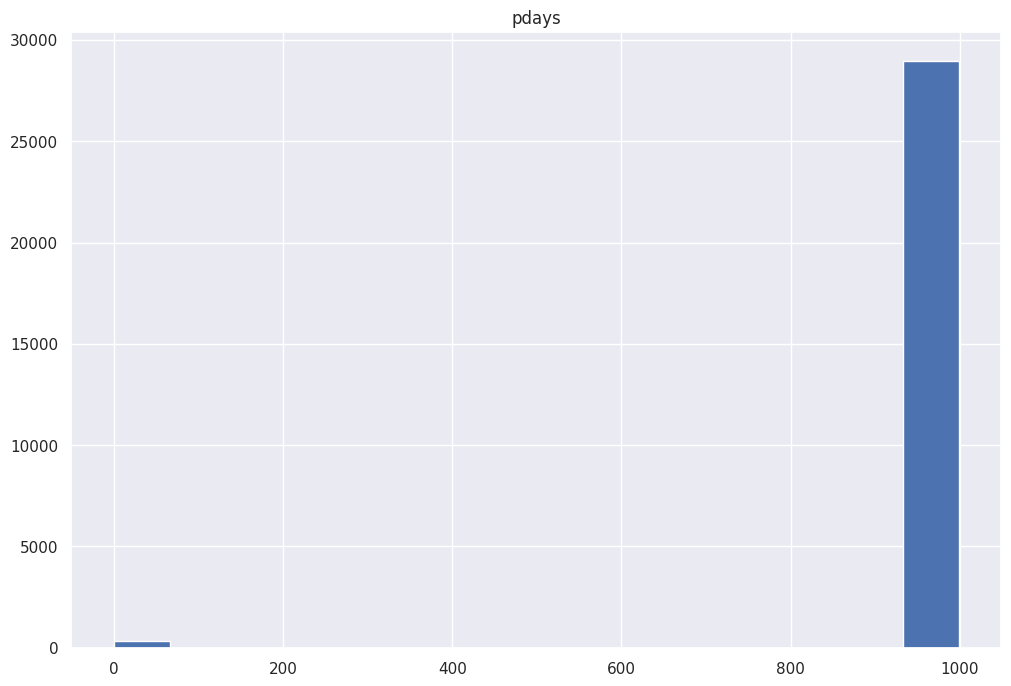

In [ ]:
trainData.hist(column=['pdays'], bins=15)


# Models

Logistic Regression
